In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [187]:
excel= pd.ExcelFile("https://docs.google.com/spreadsheets/d/1ecopK6oyyb4d_7-QLrCr8YlgFrCetHU7-VQfnYej7JY/export/format=xlsx")#WE have to edit this
excel.sheet_names

['amsterdam_weekdays',
 'amsterdam_weekends',
 'athens_weekdays',
 'athens_weekends',
 'berlin_weekends',
 'berlin_weekdays',
 'barcelona_weekdays',
 'barcelona_weekends',
 'budapest_weekdays',
 'budapest_weekends',
 'lisbon_weekdays',
 'lisbon_weekends',
 'london_weekdays',
 'london_weekends',
 'paris_weekdays',
 'paris_weekends',
 'rome_weekdays',
 'rome_weekends',
 'vienna_weekdays',
 'vienna_weekends']

**Create a column for city, country, and weekday/weekend** 

In [189]:
city_to_country = {
    
    'athens' : 'Greece',
    'amsterdam': 'Netherlands',
    'berlin' : 'Germany',
    'barcelona' : 'Spain',
    'budapest' : 'Hungary',
    'lisbon' : 'Portugal',
    'london' : 'England',
    'paris' : 'France',
    'rome' : 'Italy',
    'vienna' : 'Austria',
 
    # Add more city-country mappings as needed
}

# List to hold DataFrames from each sheet with additional columns
all_data = []

# Loop over each sheet in the Excel file
for sheet_name in excel.sheet_names:
    # Read each sheet's data
    df = excel.parse(sheet_name)
    
    # Extract city and day type (weekday/weekend) from the sheet name
    parts = sheet_name.split('_')
    city = parts[0].capitalize()  # Assumes sheet name starts with city name
    day_type = parts[1].capitalize() if len(parts) > 1 else "Unknown"  # Assumes day type follows city
    
    # Add new columns for city, country, and weekday/weekend
    df['city'] = city
    df['country'] = city_to_country.get(city.lower(), 'Unknown')
    df['day_type'] = day_type
    
    # Append to list of DataFrames
    all_data.append(df)

# Combine all sheets into a single DataFrame
combined_df = pd.concat(all_data, ignore_index=True)

combined_df.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,country,day_type
0,0,194.033698,Private room,False,True,2,False,1,0,10,...,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Amsterdam,Netherlands,Weekdays
1,1,344.245776,Private room,False,True,4,False,0,0,8,...,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Amsterdam,Netherlands,Weekdays
2,2,264.101422,Private room,False,True,2,False,0,1,9,...,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Amsterdam,Netherlands,Weekdays
3,3,433.529398,Private room,False,True,4,False,0,1,9,...,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,Amsterdam,Netherlands,Weekdays
4,4,485.552926,Private room,False,True,2,True,0,0,10,...,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,Amsterdam,Netherlands,Weekdays


In [190]:
combined_df.shape

(51707, 23)

**Change the name of column 'realSum' to 'Price'**

In [192]:
#renaming columns
combined_df=combined_df.rename(columns={"realSum": "Price"})

**Remove first column**

In [194]:
combined_df = combined_df.iloc[:, 1:]
combined_df.head()

,Price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,country,day_type
0,194.033698,Private room,False,True,2,False,1,0,10,93,...,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Amsterdam,Netherlands,Weekdays
1,344.245776,Private room,False,True,4,False,0,0,8,85,...,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Amsterdam,Netherlands,Weekdays
2,264.101422,Private room,False,True,2,False,0,1,9,87,...,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Amsterdam,Netherlands,Weekdays
3,433.529398,Private room,False,True,4,False,0,1,9,90,...,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,Amsterdam,Netherlands,Weekdays
4,485.552926,Private room,False,True,2,True,0,0,10,98,...,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,Amsterdam,Netherlands,Weekdays


In [195]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price                       51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   room_shared                 51707 non-null  bool   
 3   room_private                51707 non-null  bool   
 4   person_capacity             51707 non-null  int64  
 5   host_is_superhost           51707 non-null  bool   
 6   multi                       51707 non-null  int64  
 7   biz                         51707 non-null  int64  
 8   cleanliness_rating          51707 non-null  int64  
 9   guest_satisfaction_overall  51707 non-null  int64  
 10  bedrooms                    51707 non-null  int64  
 11  dist                        51707 non-null  float64
 12  metro_dist                  51707 non-null  float64
 13  attr_index                  517

In [196]:
combined_df.describe()

,Price,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,3.161661,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128
std,327.948386,1.298545,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000
25%,148.752174,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510
50%,211.343089,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690
75%,319.694287,4.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410


**listings in each city in total and also per type of day**

Total listings per city:
 city
Amsterdam    2080
Athens       5280
Barcelona    2833
Berlin       2484
Budapest     4022
Lisbon       5763
London       9993
Paris        6688
Rome         9027
Vienna       3537
dtype: int64

Listings per city and type of day:
 city       day_type
Amsterdam  Weekdays    1103
           Weekends     977
Athens     Weekdays    2653
           Weekends    2627
Barcelona  Weekdays    1555
           Weekends    1278
Berlin     Weekdays    1284
           Weekends    1200
Budapest   Weekdays    2074
           Weekends    1948
Lisbon     Weekdays    2857
           Weekends    2906
London     Weekdays    4614
           Weekends    5379
Paris      Weekdays    3130
           Weekends    3558
Rome       Weekdays    4492
           Weekends    4535
Vienna     Weekdays    1738
           Weekends    1799
dtype: int64


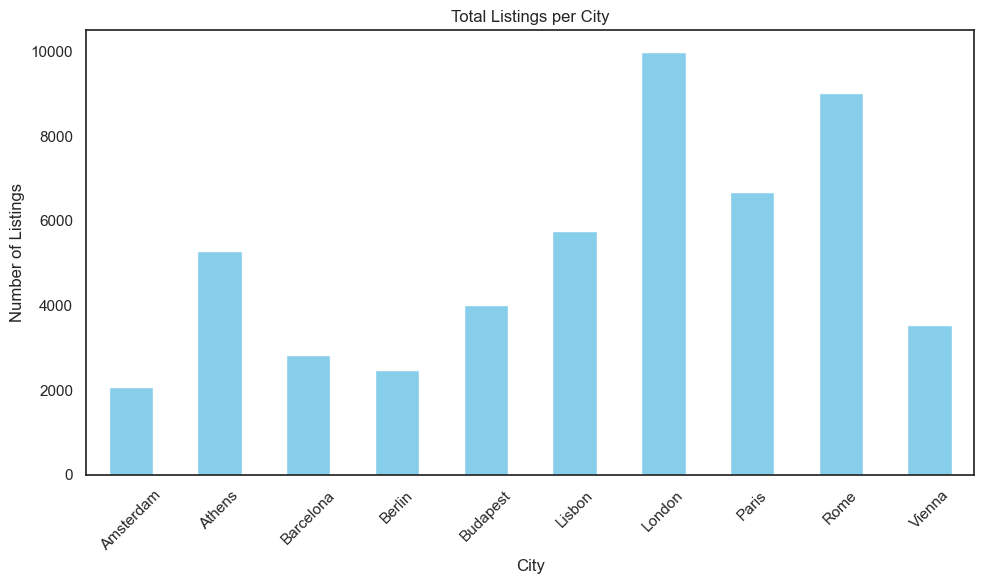

<Figure size 1000x600 with 0 Axes>

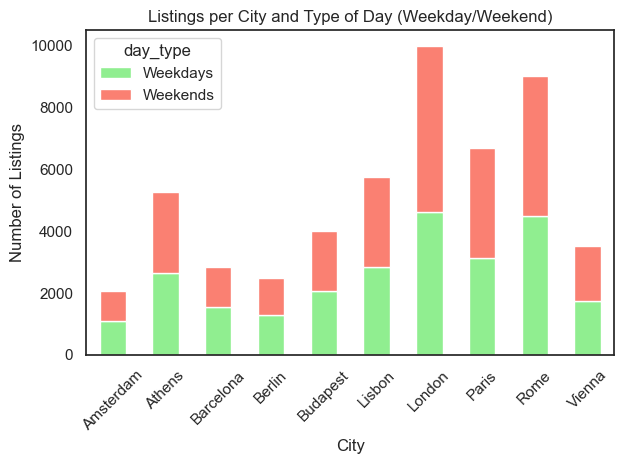

In [198]:
# Total number of listings per city
listings_per_city = combined_df.groupby('city').size()
print("Total listings per city:\n", listings_per_city)

# Number of listings per city and type of day (weekday/weekend)
listings_per_city_daytype = combined_df.groupby(['city', 'day_type']).size()
print("\nListings per city and type of day:\n", listings_per_city_daytype)


# Set up the visual style
sns.set(style="white")

# 1. Total Listings per City
plt.figure(figsize=(10, 6))
listings_per_city = combined_df.groupby('city').size()
listings_per_city.plot(kind='bar', color='skyblue')
plt.title('Total Listings per City')
plt.xlabel('City')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Listings per City and Type of Day (Weekday/Weekend)
plt.figure(figsize=(10, 6))
listings_per_city_daytype = combined_df.groupby(['city', 'day_type']).size().unstack()
listings_per_city_daytype.plot(kind='bar', stacked=True, color=['lightgreen', 'salmon'])
plt.title('Listings per City and Type of Day (Weekday/Weekend)')
plt.xlabel('City')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**City having the biggest proportion of superhosts**

The city with the highest proportion of superhosts is Athens with a proportion of 42.86%.


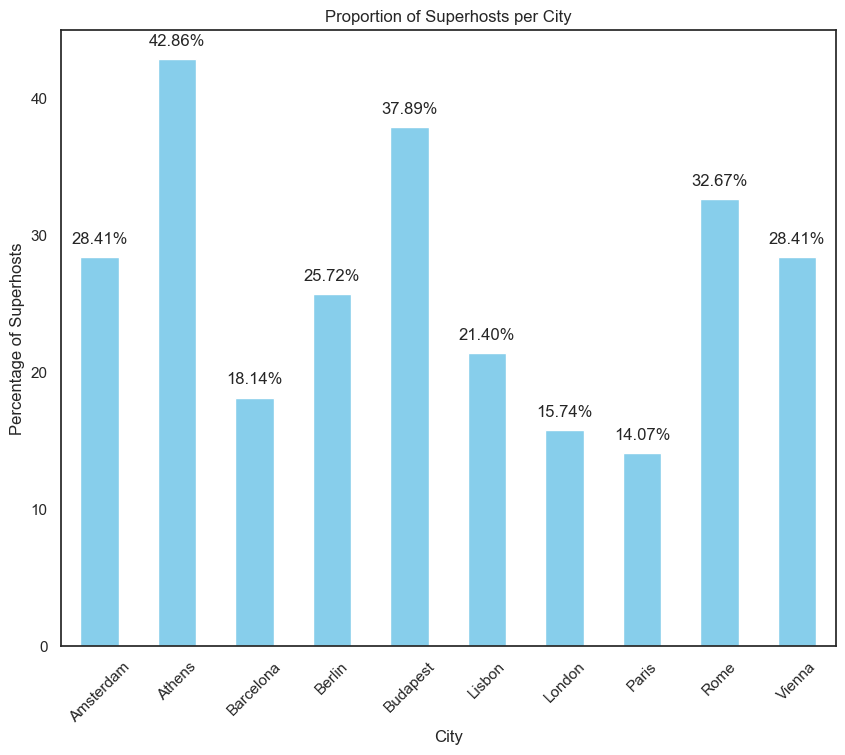

In [200]:
# Calculate the proportion of superhosts per city
proportion_superhosts = combined_df.groupby('city')['host_is_superhost'].mean() * 100

# Find the city with the largest proportion of superhosts
city_with_most_superhosts = proportion_superhosts.idxmax()
max_proportion = proportion_superhosts.max()

# Display the result
print(f"The city with the highest proportion of superhosts is {city_with_most_superhosts} with a proportion of {max_proportion:.2f}%.")

#VISUAL REPRESENTATION
# Plot the proportion of superhosts per city
plt.figure(figsize=(10, 8))
proportion_superhosts.plot(kind='bar', color='skyblue')
plt.title("Proportion of Superhosts per City")
plt.xlabel("City")
plt.ylabel("Percentage of Superhosts")
plt.xticks(rotation=45)

# Add labels above bars
for index, value in enumerate(proportion_superhosts):
    plt.text(index, value + 1, f"{value:.2f}%", ha='center')

plt.show()

**cities have listings with more than four rooms**

Cities with listings having more than four rooms:
['Amsterdam' 'Berlin' 'Barcelona' 'Lisbon' 'London' 'Paris' 'Rome']


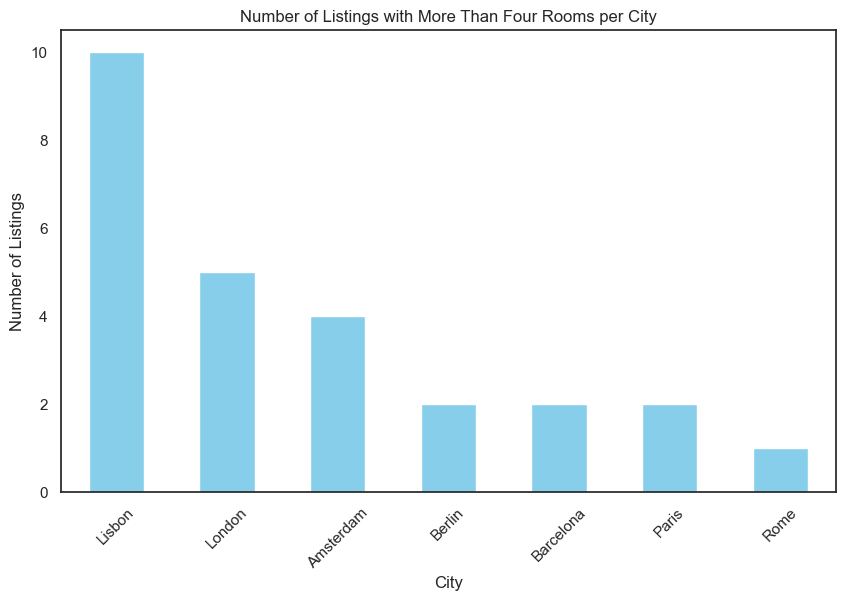

In [202]:
# Filter listings with more than four rooms
listings_more_than_four_rooms = combined_df[combined_df['bedrooms'] > 4]

# Get the cities with these listings
cities_more_than_four_rooms = listings_more_than_four_rooms['city'].unique()

# Display the cities
print("Cities with listings having more than four rooms:")
print(cities_more_than_four_rooms)

#VISUAL REPRESENTATION
# Count the number of listings with more than four rooms per city
listings_count_by_city = listings_more_than_four_rooms['city'].value_counts()
plt.figure(figsize=(10, 6))
listings_count_by_city.plot(kind='bar', color='skyblue')
plt.title('Number of Listings with More Than Four Rooms per City')
plt.xlabel('City')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

**city having the most entire home/apt type listings**

The city with the most entire home/apt listings is Rome with 5561 listings.


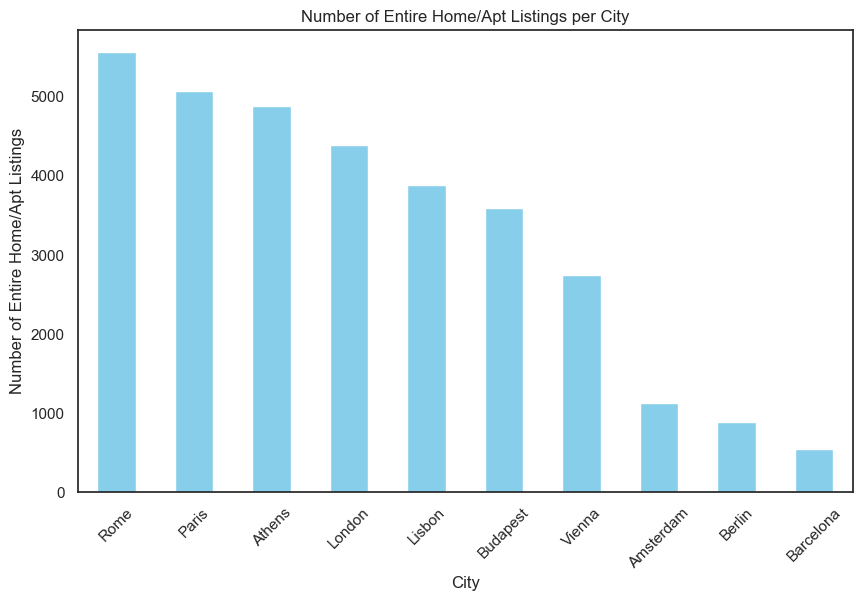

In [204]:
# Filter listings with 'Entire home/apt' type
entire_home_listings = combined_df[combined_df['room_type'] == 'Entire home/apt']

# Count the number of entire home/apt listings per city
listings_count_by_city = entire_home_listings['city'].value_counts()

# Get the city with the most entire home/apt listings
city_with_most_entire_homes = listings_count_by_city.idxmax()
most_entire_homes_count = listings_count_by_city.max()

# Display the result
print(f"The city with the most entire home/apt listings is {city_with_most_entire_homes} with {most_entire_homes_count} listings.")

#VISUAL REPRESENTATION
plt.figure(figsize=(10, 6))
listings_count_by_city.plot(kind='bar', color='skyblue')
plt.title('Number of Entire Home/Apt Listings per City')
plt.xlabel('City')
plt.ylabel('Number of Entire Home/Apt Listings')
plt.xticks(rotation=45)
plt.show()

**Are ratings typically high across listings, or is there a wide variation?**

Rating Statistics:
 count    51707.000000
mean        92.628232
std          8.945531
min         20.000000
25%         90.000000
50%         95.000000
75%         99.000000
max        100.000000
Name: guest_satisfaction_overall, dtype: float64


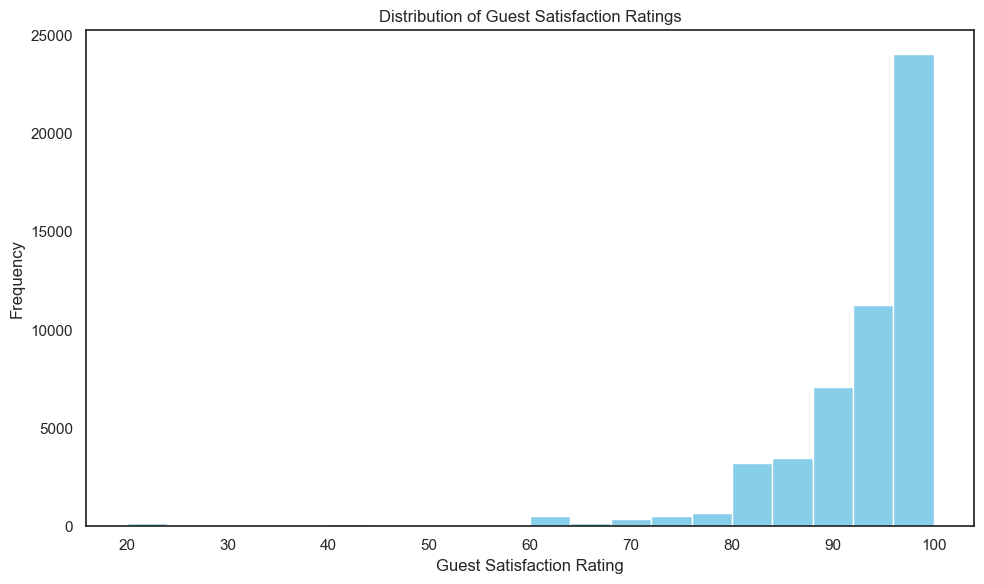

In [206]:
# Summary statistics for ratings
rating_stats = combined_df['guest_satisfaction_overall'].describe()
print("Rating Statistics:\n", rating_stats)

#VISUAL REPRESENTATION
# Plotting the histogram of guest satisfaction ratings
plt.figure(figsize=(10, 6))
plt.hist(combined_df['guest_satisfaction_overall'], bins=20, color='skyblue')
plt.title('Distribution of Guest Satisfaction Ratings')
plt.xlabel('Guest Satisfaction Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Ratings are generally high, with a majority of listings rated between 90 and 100. Moderate variation exists (as shown by the standard deviation), suggesting that while most guests are satisfied, there’s still a small proportion of listings with lower ratings.

**How does person_capacity vary across listings? What is the most common capacity of listings?**

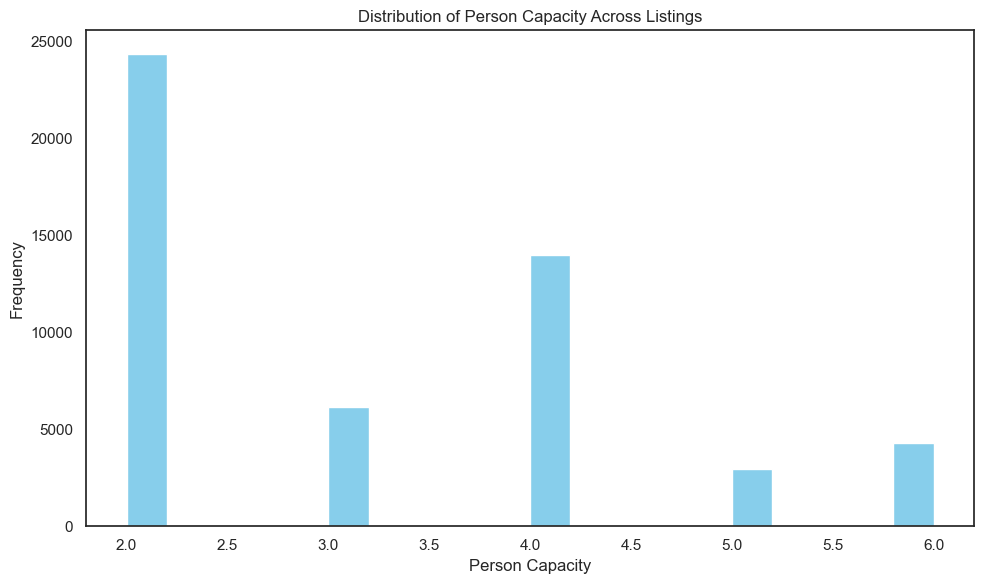

The most common person capacity is 2.


In [209]:
# Most common person capacity (mode)
most_common_capacity = combined_df['person_capacity'].mode()[0]

#VISUAL REPRESENTATION
plt.figure(figsize=(10, 6))
plt.hist(combined_df['person_capacity'], bins=20, color='skyblue')
plt.title('Distribution of Person Capacity Across Listings')
plt.xlabel('Person Capacity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
# Display the most common capacity
print(f"The most common person capacity is {most_common_capacity}.")


**Plot the distribution of realSum for both weekday and weekend offers. Is it normally distributed, skewed, or multimodal? If skewed, consider using transformations (e.g., log transformation) to normalize it.**


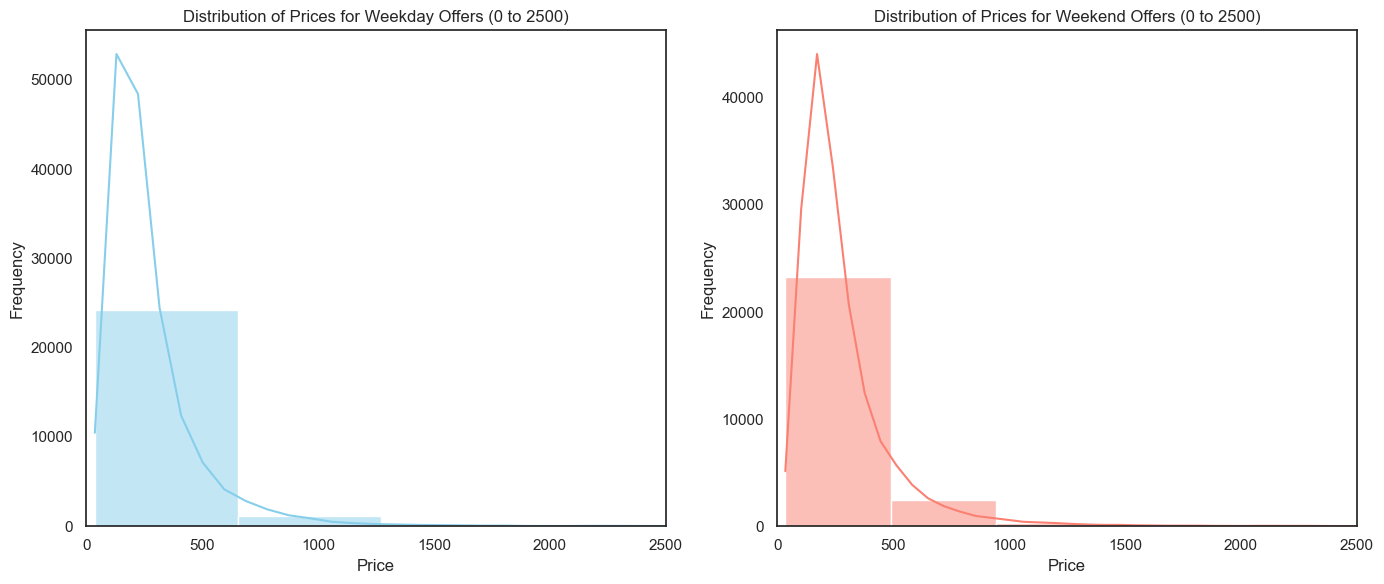

In [211]:
#Filtering data for weekdays and weekends
weekday_listings = combined_df[combined_df['day_type'] == 'Weekdays']
weekend_listings = combined_df[combined_df['day_type'] == 'Weekends']

plt.figure(figsize=(14, 6))

# Weekday prices
plt.subplot(1, 2, 1)
sns.histplot(weekday_listings['Price'], kde=True, color='skyblue', bins=30)
plt.title("Distribution of Prices for Weekday Offers (0 to 2500)")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.xlim(0, 2500)

# Weekend prices
plt.subplot(1, 2, 2)
sns.histplot(weekend_listings['Price'], kde=True, color='salmon', bins=30)
plt.title("Distribution of Prices for Weekend Offers (0 to 2500)")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.xlim(0, 2500)

plt.tight_layout()
plt.show()

**Log Tramsformation**

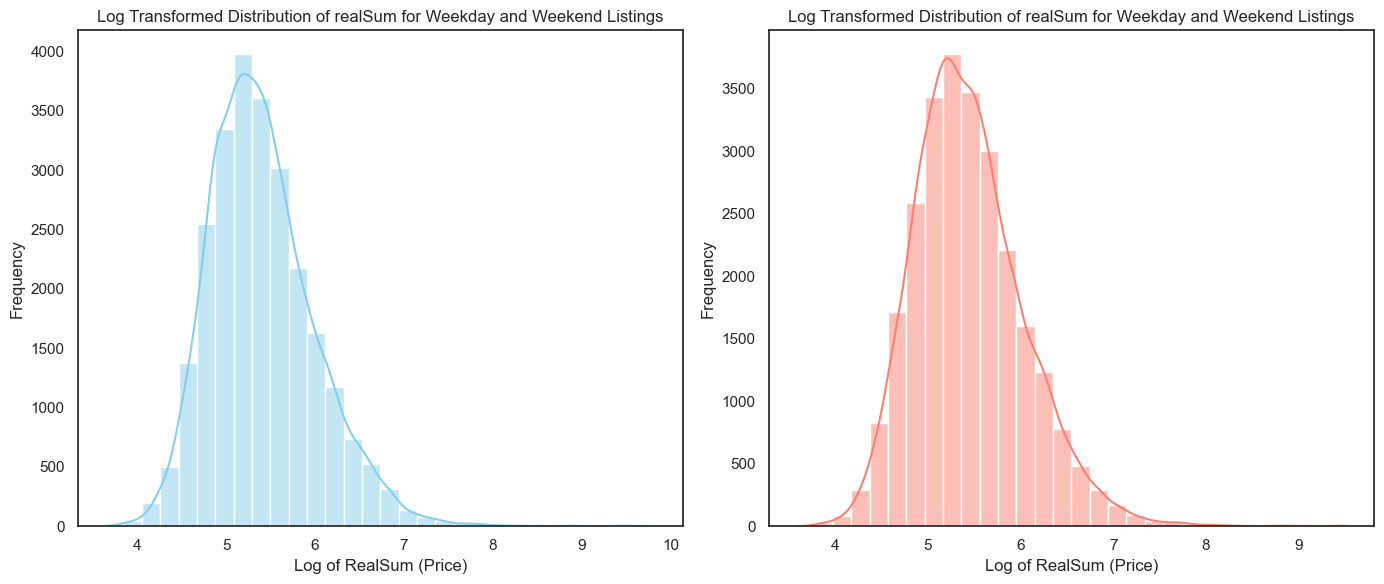

In [213]:
#Filtering data for weekdays and weekends
weekday_listings = combined_df[combined_df['day_type'] == 'Weekdays']['Price']
weekend_listings = combined_df[combined_df['day_type'] == 'Weekends']['Price']

# Apply log transformation to prices (log(1 + Price) to handle zero values)
weekday_prices_log = np.log1p(weekday_listings)
weekend_prices_log = np.log1p(weekend_listings)

plt.figure(figsize=(14, 6))
# Weekday prices
plt.subplot(1, 2, 1)
sns.histplot(weekday_prices_log, kde=True, color='skyblue', bins=30)
plt.title("Log Transformed Distribution of realSum for Weekday and Weekend Listings")
plt.xlabel("Log of RealSum (Price)")
plt.ylabel("Frequency")


# Weekend prices
plt.subplot(1, 2, 2)
sns.histplot(weekend_prices_log, kde=True, color='salmon', bins=30)
plt.title("Log Transformed Distribution of realSum for Weekday and Weekend Listings")
plt.xlabel("Log of RealSum (Price)")
plt.ylabel("Frequency")


plt.tight_layout()
plt.show()


**Plot the distribution of guest_satisfaction_overall ratings**

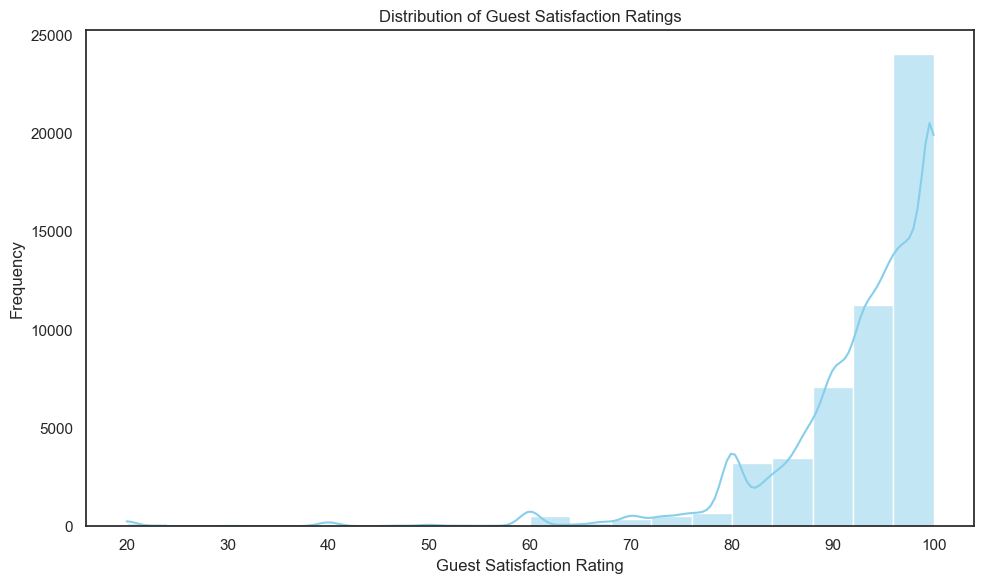

In [215]:
# Plotting the distribution of guest satisfaction ratings using a histogram and KDE plot
plt.figure(figsize=(10, 6))

# Histogram with seaborn's distplot
sns.histplot(combined_df['guest_satisfaction_overall'], bins=20, kde=True, color='skyblue')

# Title and labels
plt.title('Distribution of Guest Satisfaction Ratings')
plt.xlabel('Guest Satisfaction Rating')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()


**Examine the distribution of cleanliness_rating**

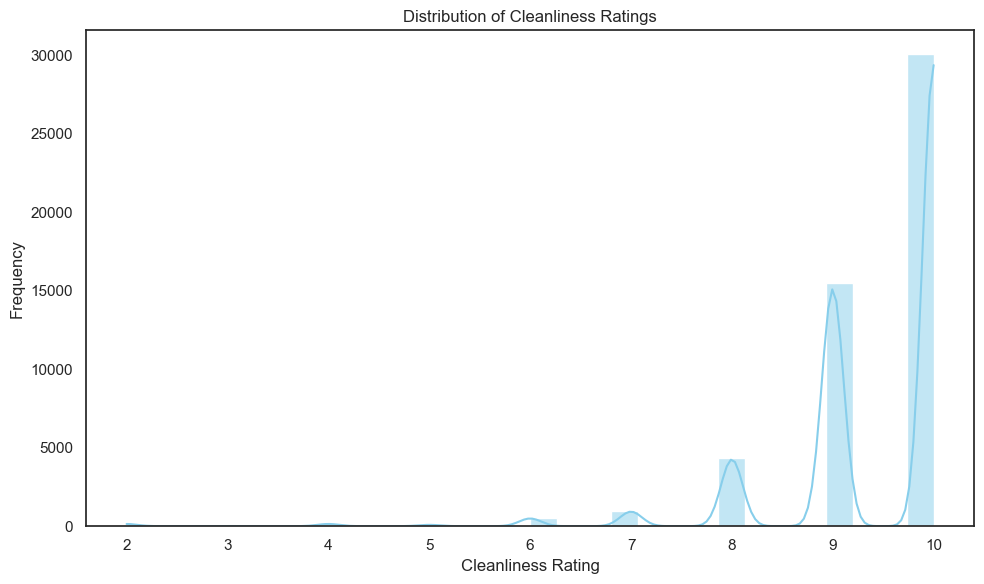

In [217]:
# Plotting the distribution of cleanliness ratings using a histogram and KDE plot
plt.figure(figsize=(10, 6))

# Histogram with seaborn's histplot (including KDE)
sns.histplot(combined_df['cleanliness_rating'], bins=30, kde=True, color='skyblue' )

# Title and labels
plt.title('Distribution of Cleanliness Ratings')
plt.xlabel('Cleanliness Rating')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()


**Is there a difference in price between two cities? Choose at least three pairs of cities during weekdays.**

In [219]:
# Filter the data for weekdays only
weekday_data = combined_df[combined_df['day_type'] == 'Weekdays']


from scipy.stats import shapiro, mannwhitneyu, ttest_ind

def compare_city_prices(city1, city2, data):
    # Filter data for each city
    city1_prices = data[data['city'] == city1]['Price']
    city2_prices = data[data['city'] == city2]['Price']
    
    # Check normality for each city's prices
    city1_normality = shapiro(city1_prices)
    city2_normality = shapiro(city2_prices)
    
    # Print Shapiro-Wilk test results for both cities
    print(f"Shapiro-Wilk test for {city1}: Stat={city1_normality.statistic:.5f}, p-value={city1_normality.pvalue:.5e}")
    print(f"Shapiro-Wilk test for {city2}: Stat={city2_normality.statistic:.5f}, p-value={city2_normality.pvalue:.5e}")
    
    # Decide on the test to use based on normality results
    if city1_normality.pvalue > 0.05 and city2_normality.pvalue > 0.05:
        print("Both groups data are normally distributed, performing T-test")
        # Use T-test if both distributions are normal
        stat, p_value = ttest_ind(city1_prices, city2_prices, equal_var=False)
        test_type = 'T-test'
    else:
        print("One or both groups data are not normally distributed, performing Mann-Whitney U test")
        # Use Mann-Whitney U test if one or both distributions are not normal
        stat, p_value = mannwhitneyu(city1_prices, city2_prices, alternative='two-sided')
        test_type = 'Mann-Whitney U test'
    
    # Print the final test results
    print(f"{test_type} Results: Stat={stat:.3f}, p-value={p_value:.5e}")



    # Visualization - Box plot for the two cities
    plt.figure(figsize=(8, 6))
    pair_data = data[data['city'].isin([city1, city2])]
    sns.boxplot(data=pair_data, x='city', y='Price', hue='city', palette='Set2', legend=False)
    plt.title(f'Price Comparison: {city1} vs {city2}')
    plt.xlabel('City')
    plt.ylabel('Price (realSum)')
    plt.show()

Shapiro-Wilk test for London: Stat=0.32127, p-value=7.14152e-85
Shapiro-Wilk test for Lisbon: Stat=0.87505, p-value=4.38003e-43
One or both groups data are not normally distributed, performing Mann-Whitney U test
Mann-Whitney U test Results: Stat=7901463.000, p-value=2.06317e-47


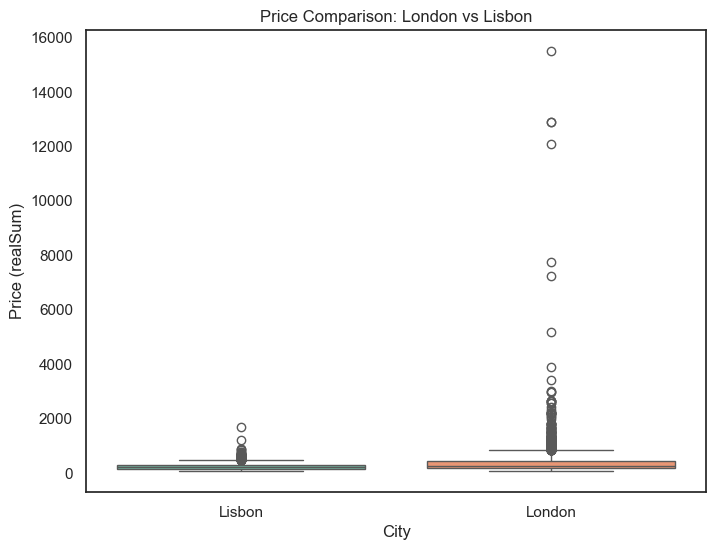

In [220]:
# Compare London vs Lisbon
compare_city_prices('London', 'Lisbon', weekday_data)

The Mann-Whitney U test results indicate a highly significant difference in price distributions between London and Lisbon, as the p-value is extremely low.

Shapiro-Wilk test for Paris: Stat=0.37966, p-value=1.39124e-73
Shapiro-Wilk test for Rome: Stat=0.65891, p-value=1.06850e-69
One or both groups data are not normally distributed, performing Mann-Whitney U test
Mann-Whitney U test Results: Stat=11685823.000, p-value=0.00000e+00


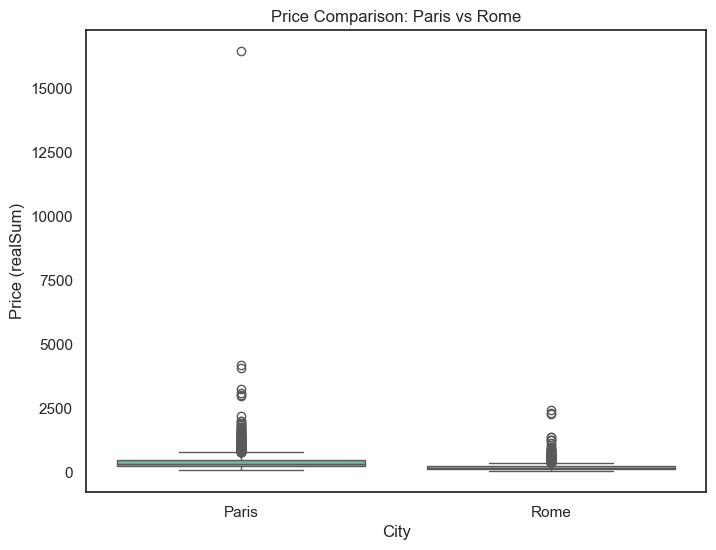

In [222]:
# Compare Paris vs Rome,
compare_city_prices('Paris', 'Rome', weekday_data)

The test result indicates a highly significant difference in prices between Paris and Rome.

Shapiro-Wilk test for Berlin: Stat=0.40903, p-value=1.11782e-53
Shapiro-Wilk test for Barcelona: Stat=0.37651, p-value=2.09871e-58
One or both groups data are not normally distributed, performing Mann-Whitney U test
Mann-Whitney U test Results: Stat=854274.000, p-value=3.44616e-11


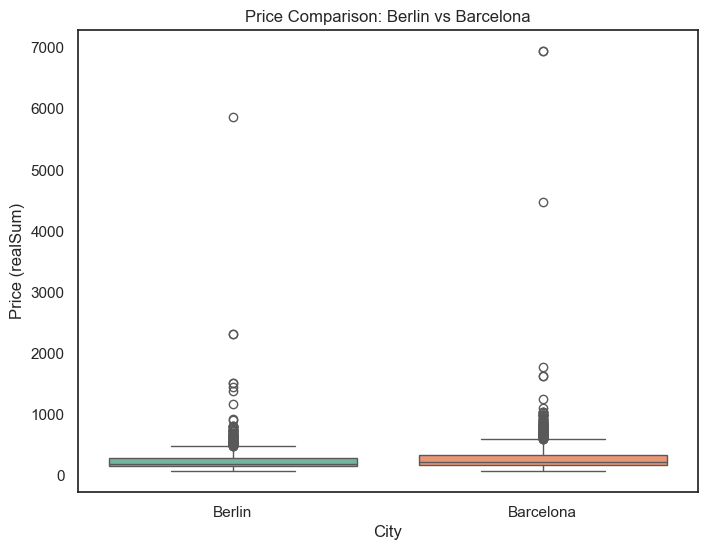

In [224]:
# Compare Berlin vs Barcelona
compare_city_prices('Berlin', 'Barcelona', weekday_data)

The Mann-Whitney U statistic is 854274.000 with a p-value of 3.44616e-11. This extremely low p-value indicates that the price distributions of Berlin and Barcelona are significantly different.

**Does the price tend to be higher on weekends?**

Median price on weekdays: 207.148848914157
Median price on weekends: 216.463414634146
Shapiro-Wilk test for Weekdays: Stat=0.31913, p-value=8.08370e-132
Shapiro-Wilk test for Weekends: Stat=0.43897, p-value=5.02425e-127
One or both groups data are not normally distributed, performing Mann-Whitney U test
Mann-Whitney U test Results: Stat=320313415.000, p-value=3.71519e-16


C:\Users\HAFIZ-TECH\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 25500.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\HAFIZ-TECH\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 26207.
  res = hypotest_fun_out(*samples, **kwds)


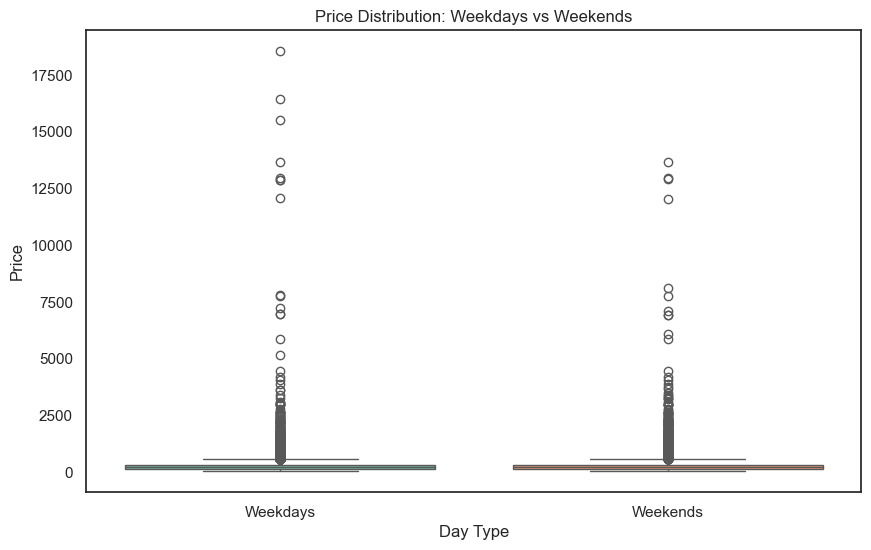

In [227]:
# Filter data for weekdays and weekends
weekday_data = combined_df[combined_df['day_type'] == 'Weekdays']
weekend_data = combined_df[combined_df['day_type'] == 'Weekends']

# Get the price data for weekdays and weekends
weekday_prices = weekday_data['Price']
weekend_prices = weekend_data['Price']

weekday_price_median = weekday_data['Price'].median()
weekend_price_median = weekend_data['Price'].median()
print(f"Median price on weekdays: {weekday_price_median}")
print(f"Median price on weekends: {weekend_price_median}")


# Check normality using Shapiro-Wilk test
weekday_normality = shapiro(weekday_prices)
weekend_normality = shapiro(weekend_prices)

print(f"Shapiro-Wilk test for Weekdays: Stat={weekday_normality.statistic:.5f}, p-value={weekday_normality.pvalue:.5e}")
print(f"Shapiro-Wilk test for Weekends: Stat={weekend_normality.statistic:.5f}, p-value={weekend_normality.pvalue:.5e}")

# Perform the appropriate test based on normality
if weekday_normality.pvalue > 0.05 and weekend_normality.pvalue > 0.05:
    print("Both groups data are normally distributed, performing T-test")
    stat, p_value = ttest_ind(weekday_prices, weekend_prices, equal_var=False)
    test_type = 'T-test'
else:
    print("One or both groups data are not normally distributed, performing Mann-Whitney U test")
    stat, p_value = mannwhitneyu(weekday_prices, weekend_prices, alternative='two-sided')
    test_type = 'Mann-Whitney U test'

# Print the final test results
print(f"{test_type} Results: Stat={stat:.3f}, p-value={p_value:.5e}")

# Visualizing the price distributions
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_type', y='Price', data=combined_df, hue='day_type', palette='Set2', legend=False)
plt.title('Price Distribution: Weekdays vs Weekends')
plt.xlabel('Day Type')
plt.ylabel('Price')
plt.show()


There is a significant difference in prices between weekdays and weekends. And since the median price for weekends is higher, we can conclude that prices tend to be higher on weekends.

**Are listings of superhosts more expensive than those of normal hosts?**

Mean price for Superhosts: 254.447725947198
Mean price for Normal Hosts: 288.62590531393374
Shapiro-Wilk test for Superhosts: Stat=0.31567, p-value=3.39193e-113
Shapiro-Wilk test for Normal Hosts: Stat=0.38690, p-value=1.37511e-140
One or both groups data are not normally distributed, performing Mann-Whitney U test...
Mann-Whitney U test Results: Stat=230623961.500, p-value=1.05701e-58


C:\Users\HAFIZ-TECH\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13232.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\HAFIZ-TECH\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 38475.
  res = hypotest_fun_out(*samples, **kwds)


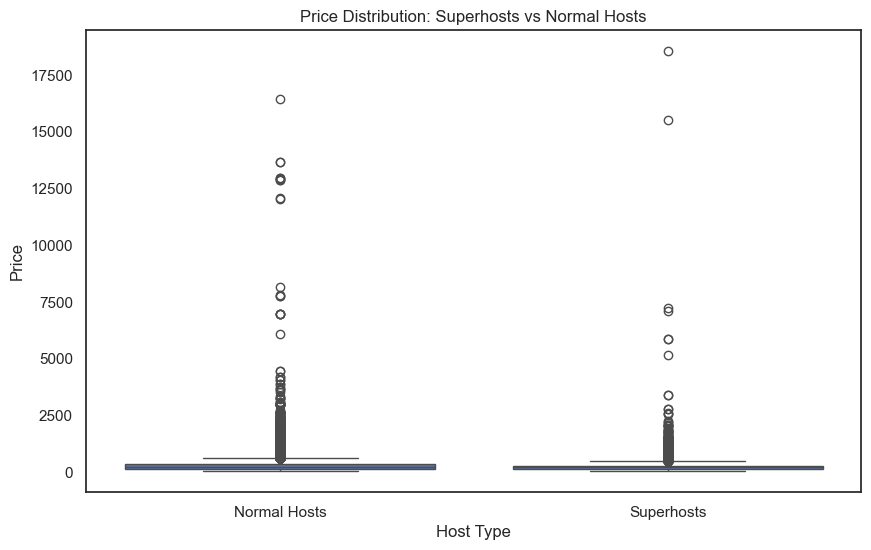

In [230]:
# Filter the data for superhosts and normal hosts
superhost_data = combined_df[combined_df['host_is_superhost'] == True]['Price']
normalhost_data = combined_df[combined_df['host_is_superhost'] == False]['Price']

superhost_mean_price = superhost_data.mean()
normalhost_mean_price = normalhost_data.mean()
print(f"Mean price for Superhosts: {superhost_mean_price}")
print(f"Mean price for Normal Hosts: {normalhost_mean_price}")


# Check normality for both groups
superhost_normality = shapiro(superhost_data)
normalhost_normality = shapiro(normalhost_data)

print(f"Shapiro-Wilk test for Superhosts: Stat={superhost_normality.statistic:.5f}, p-value={superhost_normality.pvalue:.5e}")
print(f"Shapiro-Wilk test for Normal Hosts: Stat={normalhost_normality.statistic:.5f}, p-value={normalhost_normality.pvalue:.5e}")

# Perform the appropriate test based on normality
if superhost_normality.pvalue > 0.05 and normalhost_normality.pvalue > 0.05:
    print("Both groups' data are normally distributed, performing T-test...")
    stat, p_value = ttest_ind(superhost_data, normalhost_data, equal_var=False)
    test_type = 'T-test'
else:
    print("One or both groups data are not normally distributed, performing Mann-Whitney U test...")
    stat, p_value = mannwhitneyu(superhost_data, normalhost_data, alternative='two-sided')
    test_type = 'Mann-Whitney U test'

# Display results
print(f"{test_type} Results: Stat={stat:.3f}, p-value={p_value:.5e}")


# Combine the data into a new DataFrame for easy plotting
combined_df['host_is_superhost'] = combined_df['host_is_superhost'].astype(bool)  # Convert to boolean if needed

# Create a boxplot to compare the prices for superhosts and normal hosts
plt.figure(figsize=(10, 6))
sns.boxplot(x='host_is_superhost', y='Price', data=combined_df)
plt.title('Price Distribution: Superhosts vs Normal Hosts')
plt.xlabel('Host Type')
plt.ylabel('Price')
plt.xticks([0, 1], ['Normal Hosts', 'Superhosts'])  # Label x-axis
plt.show()



The difference in prices between superhosts and normal hosts is statistically significant. Listings of normal hosts tend to be more expensive than those of superhosts.

**Are superhosts closer to the city center and metro station than normal hosts?**

City Center Distance - Mean:
Superhosts: 2.96
Normal Hosts: 3.27

City Center Distance - Median:
Superhosts: 2.39
Normal Hosts: 2.70

Metro Station Distance - Mean:
Superhosts: 0.68
Normal Hosts: 0.68

Metro Station Distance - Median:
Superhosts: 0.43
Normal Hosts: 0.41


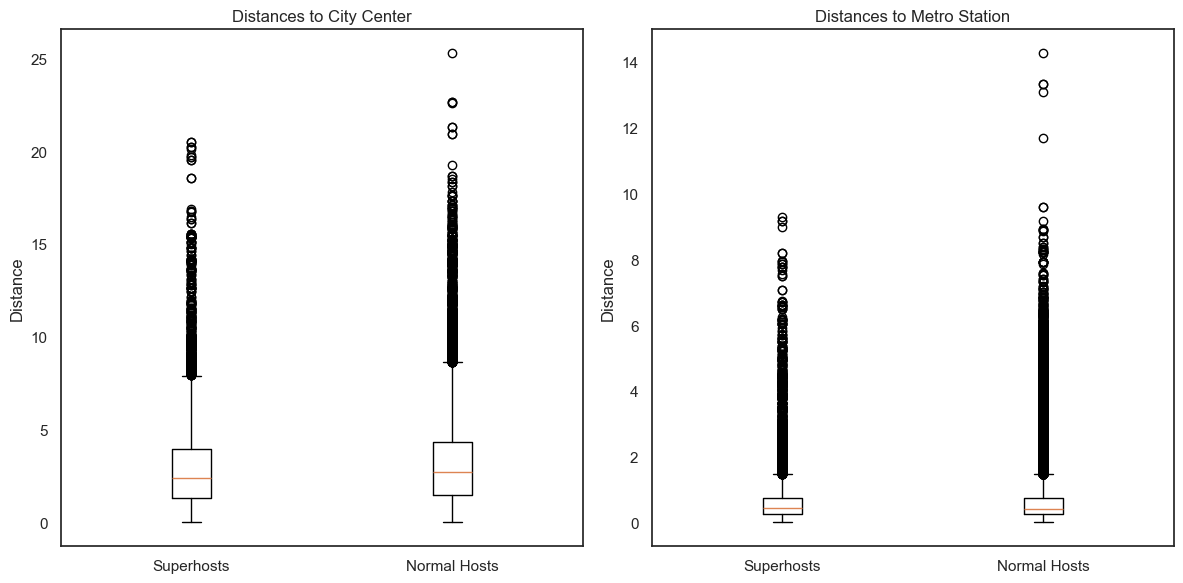

Shapiro-Wilk test for Superhosts (City Center): Stat=0.84226, p-value=1.04633e-77
Shapiro-Wilk test for Normal Hosts (City Center): Stat=0.87839, p-value=6.22719e-96
Shapiro-Wilk test for Superhosts (Metro): Stat=0.59932, p-value=1.82582e-99
Shapiro-Wilk test for Normal Hosts (Metro): Stat=0.58884, p-value=9.36351e-129
Performing Mann-Whitney U test for City Center...
Mann-Whitney U test Results for City Center: Stat=232379752.000, p-value=1.17117e-50
Performing Mann-Whitney U test for Metro Station...
Mann-Whitney U test Results for Metro Station: Stat=263778575.000, p-value=4.65239e-10


C:\Users\HAFIZ-TECH\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13232.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\HAFIZ-TECH\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 38475.
  res = hypotest_fun_out(*samples, **kwds)


In [233]:
from scipy.stats import shapiro, ttest_ind, mannwhitneyu
import matplotlib.pyplot as plt

# Filter data for superhosts and normal hosts
superhost_data_city_center = combined_df[combined_df['host_is_superhost'] == True]['dist']
normalhost_data_city_center = combined_df[combined_df['host_is_superhost'] == False]['dist']

superhost_data_metro = combined_df[combined_df['host_is_superhost'] == True]['metro_dist']
normalhost_data_metro = combined_df[combined_df['host_is_superhost'] == False]['metro_dist']

# Calculate mean or median distances for both superhosts and normal hosts for city center and metro station

# Calculate mean and median distances for both superhosts and normal hosts for city center and metro station

# For City Center Distance
superhost_city_center_mean = superhost_data_city_center.mean()
normalhost_city_center_mean = normalhost_data_city_center.mean()

superhost_city_center_median = superhost_data_city_center.median()
normalhost_city_center_median = normalhost_data_city_center.median()

# For Metro Station Distance
superhost_metro_mean = superhost_data_metro.mean()
normalhost_metro_mean = normalhost_data_metro.mean()

superhost_metro_median = superhost_data_metro.median()
normalhost_metro_median = normalhost_data_metro.median()

# Display the results
print("City Center Distance - Mean:")
print(f"Superhosts: {superhost_city_center_mean:.2f}")
print(f"Normal Hosts: {normalhost_city_center_mean:.2f}")
print("\nCity Center Distance - Median:")
print(f"Superhosts: {superhost_city_center_median:.2f}")
print(f"Normal Hosts: {normalhost_city_center_median:.2f}")

print("\nMetro Station Distance - Mean:")
print(f"Superhosts: {superhost_metro_mean:.2f}")
print(f"Normal Hosts: {normalhost_metro_mean:.2f}")
print("\nMetro Station Distance - Median:")
print(f"Superhosts: {superhost_metro_median:.2f}")
print(f"Normal Hosts: {normalhost_metro_median:.2f}")



# Visualize the distances to city center and metro station
plt.figure(figsize=(12, 6))

# City Center Distances
plt.subplot(1, 2, 1)
plt.boxplot([superhost_data_city_center, normalhost_data_city_center], labels=['Superhosts', 'Normal Hosts'])
plt.title('Distances to City Center')
plt.ylabel('Distance')

# Metro Station Distances
plt.subplot(1, 2, 2)
plt.boxplot([superhost_data_metro, normalhost_data_metro], labels=['Superhosts', 'Normal Hosts'])
plt.title('Distances to Metro Station')
plt.ylabel('Distance')

plt.tight_layout()
plt.show()

# Perform normality tests
shapiro_city_center_superhost = shapiro(superhost_data_city_center)
shapiro_city_center_normalhost = shapiro(normalhost_data_city_center)
shapiro_metro_superhost = shapiro(superhost_data_metro)
shapiro_metro_normalhost = shapiro(normalhost_data_metro)

# Print Shapiro-Wilk test results
print(f"Shapiro-Wilk test for Superhosts (City Center): Stat={shapiro_city_center_superhost.statistic:.5f}, p-value={shapiro_city_center_superhost.pvalue:.5e}")
print(f"Shapiro-Wilk test for Normal Hosts (City Center): Stat={shapiro_city_center_normalhost.statistic:.5f}, p-value={shapiro_city_center_normalhost.pvalue:.5e}")
print(f"Shapiro-Wilk test for Superhosts (Metro): Stat={shapiro_metro_superhost.statistic:.5f}, p-value={shapiro_metro_superhost.pvalue:.5e}")
print(f"Shapiro-Wilk test for Normal Hosts (Metro): Stat={shapiro_metro_normalhost.statistic:.5f}, p-value={shapiro_metro_normalhost.pvalue:.5e}")

# Perform Mann-Whitney U test if data is not normal, or t-test if normal
def compare_distances(superhost_data, normalhost_data, distance_type):
    if superhost_data.shape[0] > 2 and normalhost_data.shape[0] > 2:  # Check for enough data
        if superhost_data.shape[0] > 2 and normalhost_data.shape[0] > 2:
            if (shapiro(superhost_data)[1] > 0.05) and (shapiro(normalhost_data)[1] > 0.05):
                print(f"Performing T-test for {distance_type}...")
                stat, p_value = ttest_ind(superhost_data, normalhost_data, equal_var=False)
                print(f"T-test Results for {distance_type}: Stat={stat:.3f}, p-value={p_value:.5e}")
            else:
                print(f"Performing Mann-Whitney U test for {distance_type}...")
                stat, p_value = mannwhitneyu(superhost_data, normalhost_data, alternative='two-sided')
                print(f"Mann-Whitney U test Results for {distance_type}: Stat={stat:.3f}, p-value={p_value:.5e}")
                
# Compare city center distances
compare_distances(superhost_data_city_center, normalhost_data_city_center, 'City Center')

# Compare metro distances
compare_distances(superhost_data_metro, normalhost_data_metro, 'Metro Station')


Superhosts are closer to city center, but metro distance is the same.

**Are superhosts cleaner than normal hosts?**

Mean cleanliness rating for Superhosts: 9.83
Mean cleanliness rating for Normal Hosts: 9.24
Median cleanliness rating for Superhosts: 10.00
Median cleanliness rating for Normal Hosts: 9.00
Shapiro-Wilk test for Superhosts' Cleanliness Ratings: Stat=0.40942, p-value=2.51163e-109
Shapiro-Wilk test for Normal Hosts' Cleanliness Ratings: Stat=0.69179, p-value=1.51254e-120
One or both groups' data are not normally distributed, performing Mann-Whitney U test...
Mann-Whitney U test Results: Stat=350501184.500, p-value=0.00000e+00


C:\Users\HAFIZ-TECH\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13232.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\HAFIZ-TECH\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 38475.
  res = hypotest_fun_out(*samples, **kwds)


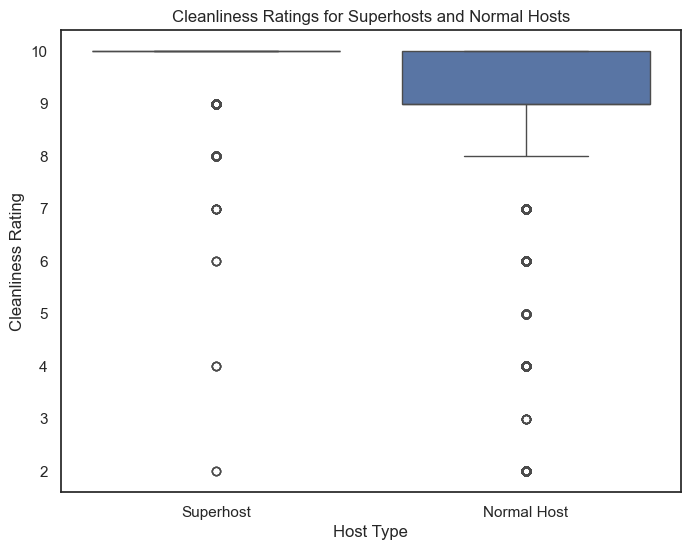

In [236]:
superhost_cleanliness = combined_df[combined_df['host_is_superhost'] == True]['cleanliness_rating']
normalhost_cleanliness = combined_df[combined_df['host_is_superhost'] == False]['cleanliness_rating']

# Calculate the mean cleanliness ratings for both groups
superhost_cleanliness_mean = superhost_cleanliness.mean()
normalhost_cleanliness_mean = normalhost_cleanliness.mean()

# Calculate the median cleanliness ratings for both groups
superhost_cleanliness_median = superhost_cleanliness.median()
normalhost_cleanliness_median = normalhost_cleanliness.median()

# Print the results
print(f"Mean cleanliness rating for Superhosts: {superhost_cleanliness_mean:.2f}")
print(f"Mean cleanliness rating for Normal Hosts: {normalhost_cleanliness_mean:.2f}")
print(f"Median cleanliness rating for Superhosts: {superhost_cleanliness_median:.2f}")
print(f"Median cleanliness rating for Normal Hosts: {normalhost_cleanliness_median:.2f}")


# Check normality for superhosts' cleanliness ratings
superhost_normality = shapiro(superhost_cleanliness)
# Check normality for normal hosts' cleanliness ratings
normalhost_normality = shapiro(normalhost_cleanliness)

print(f"Shapiro-Wilk test for Superhosts' Cleanliness Ratings: Stat={superhost_normality.statistic:.5f}, p-value={superhost_normality.pvalue:.5e}")
print(f"Shapiro-Wilk test for Normal Hosts' Cleanliness Ratings: Stat={normalhost_normality.statistic:.5f}, p-value={normalhost_normality.pvalue:.5e}")

from scipy.stats import ttest_ind, mannwhitneyu

# Check which test to perform based on normality results
if superhost_normality.pvalue > 0.05 and normalhost_normality.pvalue > 0.05:
    print("Both groups' data are normally distributed, performing T-test...")
    stat, p_value = ttest_ind(superhost_cleanliness, normalhost_cleanliness, equal_var=False)
    test_type = 'T-test'
else:
    print("One or both groups' data are not normally distributed, performing Mann-Whitney U test...")
    stat, p_value = mannwhitneyu(superhost_cleanliness, normalhost_cleanliness, alternative='two-sided')
    test_type = 'Mann-Whitney U test'

# Print the final test results
print(f"{test_type} Results: Stat={stat:.3f}, p-value={p_value:.5e}")


# Combine the data into a new DataFrame for visualization
data = pd.DataFrame({
    'Cleanliness Rating': pd.concat([superhost_cleanliness, normalhost_cleanliness]),
    'Host Type': ['Superhost'] * len(superhost_cleanliness) + ['Normal Host'] * len(normalhost_cleanliness)
})

# Create a boxplot to compare the cleanliness ratings between superhosts and normal hosts
plt.figure(figsize=(8, 6))
sns.boxplot(x='Host Type', y='Cleanliness Rating', data=data)
plt.title('Cleanliness Ratings for Superhosts and Normal Hosts')
plt.xlabel('Host Type')
plt.ylabel('Cleanliness Rating')
plt.show()


Superhost have better cleanliness rating.

**Is there a pattern between room types and superhost status?**

In [239]:
# Create a contingency table
contingency_table = pd.crosstab(combined_df['room_type'], combined_df['host_is_superhost'])

# Display the table
print(contingency_table)

from scipy.stats import chi2_contingency

# Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"p-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies Table:\n{expected}")



host_is_superhost  False  True 
room_type                      
Entire home/apt    23704   8944
Private room       14446   4247
Shared room          325     41
Chi-Square Statistic: 176.54066965543066
p-value: 4.620411632426391e-39
Degrees of Freedom: 2
Expected Frequencies Table:
[[24293.26396813  8354.73603187]
 [13909.39669677  4783.60330323]
 [  272.3393351     93.6606649 ]]


Contingency Table:
The table shows the number of superhosts (True) and non-superhosts (False) for different room types (Entire home/apt, Private room, and Shared room).
Entire home/apt has the highest number of both superhosts and normal hosts.
Private room is the second most common room type, with superhosts having fewer listings than normal hosts.
Shared room is the least common, with very few superhosts and normal hosts in this category.

There is a significant pattern between room types and whether a host is a superhost. This means that the likelihood of a host being a superhost depends on the type of room they offer. For example:
Superhosts are more likely to list entire homes or apartments than shared rooms.
Private rooms tend to be more common for normal hosts compared to superhosts.


Shapiro-Wilk test for Amsterdam:
Entire home/apt - Stat=0.60032, p-value=5.19088e-45
Private room - Stat=0.75099, p-value=2.07329e-35

Performing Mann-Whitney U test for Amsterdam:
Mann-Whitney U test Results: Stat=909188.000, p-value=3.75352e-171

Shapiro-Wilk test for Athens:
Entire home/apt - Stat=0.09120, p-value=6.48845e-93
Private room - Stat=0.59568, p-value=2.21168e-29

Performing Mann-Whitney U test for Athens:
Mann-Whitney U test Results: Stat=1470533.000, p-value=7.30668e-67

Shapiro-Wilk test for Berlin:
Entire home/apt - Stat=0.39090, p-value=3.47341e-47
Private room - Stat=0.47537, p-value=4.57733e-55

Performing Mann-Whitney U test for Berlin:
Mann-Whitney U test Results: Stat=1189259.000, p-value=8.89821e-215

Shapiro-Wilk test for Barcelona:
Entire home/apt - Stat=0.32323, p-value=1.71935e-40
Private room - Stat=0.70662, p-value=7.05002e-53

Performing Mann-Whitney U test for Barcelona:
Mann-Whitney U test Results: Stat=1184866.500, p-value=6.31544e-243

Shapiro-Wilk 

C:\Users\HAFIZ-TECH\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5559.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\HAFIZ-TECH\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5067.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\HAFIZ-TECH\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5561.
  res = hypotest_fun_out(*samples, **kwds)


<Figure size 1200x800 with 0 Axes>

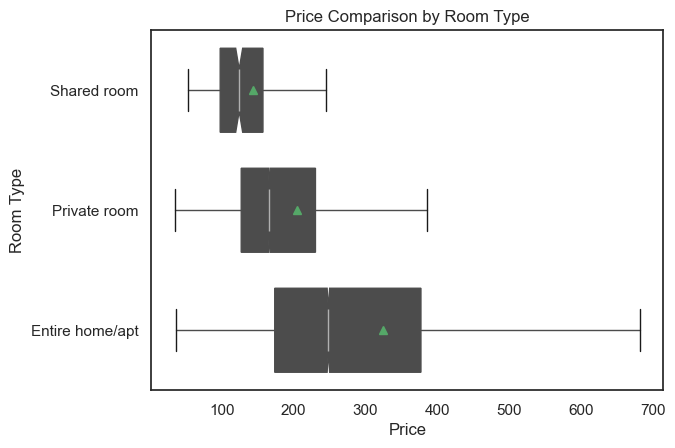

In [241]:
from scipy.stats import shapiro, ttest_ind, mannwhitneyu
import matplotlib.pyplot as plt

# Filter data for different room types and cities
entire_home_apt_data = combined_df[combined_df['room_type'] == 'Entire home/apt']
private_room_data = combined_df[combined_df['room_type'] == 'Private room']

# Step 1: Calculate the price distribution and check normality using Shapiro-Wilk test

# For each city, check normality for both room types
for city in combined_df['city'].unique():
    entire_home_apt_city = entire_home_apt_data[entire_home_apt_data['city'] == city]['Price']
    private_room_city = private_room_data[private_room_data['city'] == city]['Price']
    
    # Perform Shapiro-Wilk test for normality
    stat_entire_home_apt, p_value_entire_home_apt = shapiro(entire_home_apt_city)
    stat_private_room, p_value_private_room = shapiro(private_room_city)
    
    print(f"\nShapiro-Wilk test for {city}:")
    print(f"Entire home/apt - Stat={stat_entire_home_apt:.5f}, p-value={p_value_entire_home_apt:.5e}")
    print(f"Private room - Stat={stat_private_room:.5f}, p-value={p_value_private_room:.5e}")
    
    # Step 2: Choose test based on normality
    if p_value_entire_home_apt > 0.05 and p_value_private_room > 0.05:  # Data is normal
        print(f"\nPerforming T-test for {city}:")
        stat, p_value = ttest_ind(entire_home_apt_city, private_room_city, equal_var=False)
        print(f"T-test Results: Stat={stat:.3f}, p-value={p_value:.5e}")
    else:  # Data is not normal
        print(f"\nPerforming Mann-Whitney U test for {city}:")
        stat, p_value = mannwhitneyu(entire_home_apt_city, private_room_city, alternative='two-sided')
        print(f"Mann-Whitney U test Results: Stat={stat:.3f}, p-value={p_value:.5e}")

# Step 3: Visualize the price distributions for room types across cities
plt.figure(figsize=(12, 8))

# Create a boxplot to visualize price distributions across room types and cities
combined_df.boxplot(column='Price', by='room_type', grid=False, patch_artist=True,
                    notch=True, showmeans=True, showfliers=False, 
                    vert=False, widths=0.7)

plt.title('Price Comparison by Room Type')
plt.suptitle('')
plt.xlabel('Price')
plt.ylabel('Room Type')
plt.show()


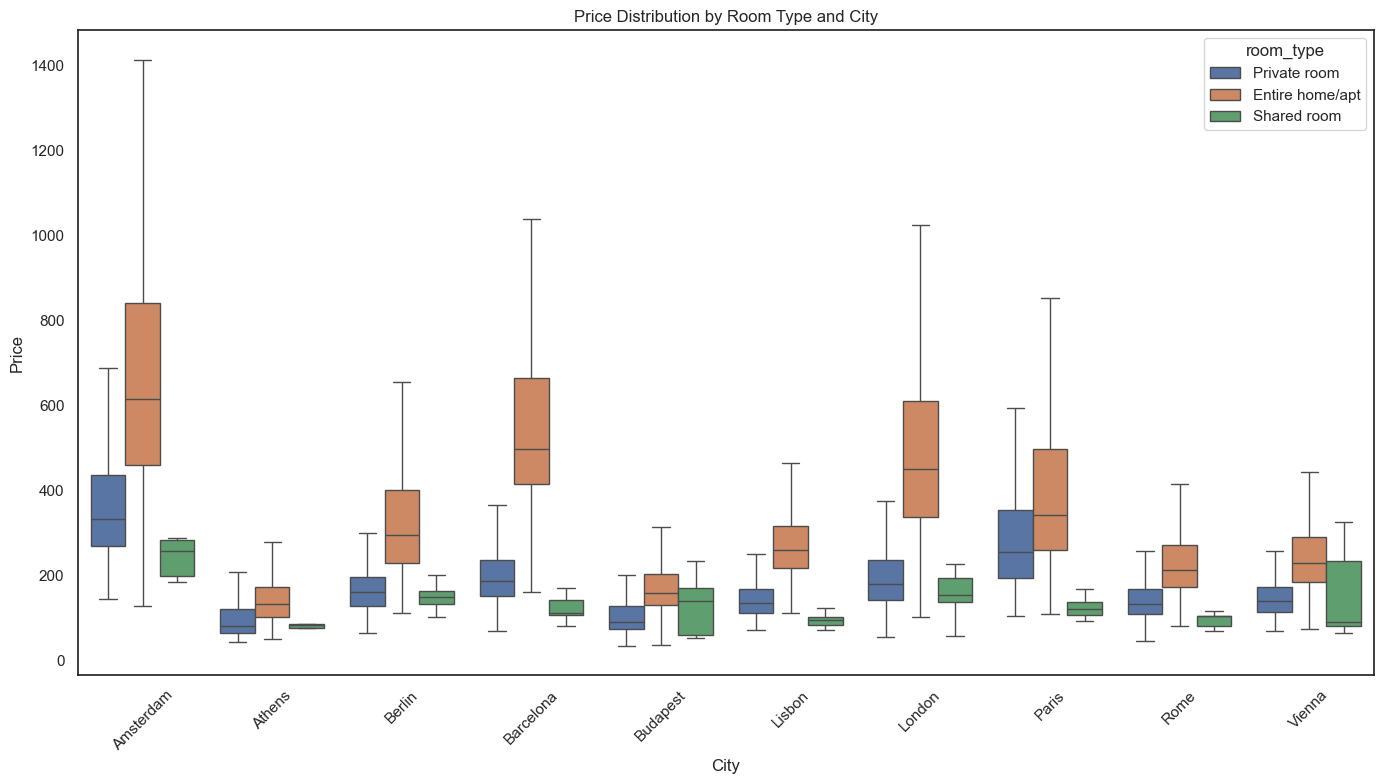

In [242]:
import seaborn as sns

# Create boxplots for price comparison by room type and city
plt.figure(figsize=(14, 8))
sns.boxplot(data=combined_df, x='city', y='Price', hue='room_type', showfliers=False)

# Title and labels
plt.title('Price Distribution by Room Type and City')
plt.xlabel('City')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Based on the analysis:
Renting an entire home/apt is consistently more expensive than renting a private room across all cities.
This price difference does not depend on the city, as the significant difference is observed in each city you tested.
Thus, we can confidently conclude that the trend of entire homes/apartments being more expensive than private rooms is consistent across cities in our dataset.